In [2]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

In [3]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import gc

import pandas as pd

In [4]:
def robstd(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [5]:
# these are the tests and their codes
tests = {"A": "Global Range",
         "B": "Noisy Profile",
         "C": "High-Deep Value",
         "D": "Surface Hook", 
         "E": "Missing Data",
         "F": "Negative non-surface",
         "G": "Parking Hook"      
        }

In [6]:
# find all pickled results
fn_pkl = glob.glob("plots/*/*pkl")

all_PROFS = []
for fn in fn_pkl:
    print(fn)
    infile = open(fn,'rb')
    tmp_all_PROFS = pickle.load(infile)
    infile.close()
    
    all_PROFS.extend(tmp_all_PROFS)


plots/5905376/aoml_BD5905376.pkl
plots/6903093/coriolis_BR6903093.pkl
plots/2902120/incois_BR2902120.pkl
plots/5906296/aoml_BR5906296.pkl
plots/5906031/aoml_BR5906031.pkl
plots/6903550/coriolis_BR6903550.pkl
plots/6902743/coriolis_BD6902743.pkl
plots/2902114/incois_BD2902114.pkl
plots/6901649/coriolis_BD6901649.pkl
plots/6901656/coriolis_BR6901656.pkl
plots/6901511/coriolis_BD6901511.pkl
plots/6901866/coriolis_BD6901866.pkl
plots/6903570/coriolis_BR6903570.pkl
plots/5906307/aoml_BR5906307.pkl
plots/6901183/bodc_BR6901183.pkl
plots/7900561/coriolis_BR7900561.pkl
plots/2902753/csio_BR2902753.pkl
plots/5906226/aoml_BR5906226.pkl
plots/2902241/incois_BR2902241.pkl
plots/6901860/coriolis_BR6901860.pkl
plots/5904671/aoml_BD5904671.pkl
plots/6901580/coriolis_BD6901580.pkl
plots/6902549/coriolis_BR6902549.pkl
plots/2902205/incois_BR2902205.pkl
plots/2902195/incois_BR2902195.pkl
plots/5904478/aoml_BD5904478.pkl
plots/5904858/aoml_BD5904858.pkl
plots/5906006/aoml_BD5906006.pkl
plots/3901498/bodc

plots/5905636/aoml_BD5905636.pkl
plots/6902826/coriolis_BR6902826.pkl
plots/5906293/aoml_BR5906293.pkl
plots/2902272/incois_BR2902272.pkl
plots/5905988/aoml_BR5905988.pkl
plots/5905104/aoml_BR5905104.pkl
plots/2902299/incois_BR2902299.pkl
plots/5906310/aoml_BR5906310.pkl
plots/6903551/coriolis_BD6903551.pkl
plots/6901657/coriolis_BD6901657.pkl
plots/5905981/aoml_BD5905981.pkl
plots/6901764/coriolis_BD6901764.pkl
plots/5904767/aoml_BD5904767.pkl
plots/2902264/incois_BR2902264.pkl
plots/3902120/coriolis_BR3902120.pkl
plots/5905369/aoml_BD5905369.pkl
plots/5904474/aoml_BD5904474.pkl
plots/5906342/aoml_BR5906342.pkl
plots/5904476/aoml_BD5904476.pkl
plots/5906206/aoml_BR5906206.pkl
plots/5905165/csiro_BR5905165.pkl
plots/5904396/aoml_BD5904396.pkl
plots/5905984/aoml_BR5905984.pkl
plots/7900586/coriolis_BR7900586.pkl
plots/5904185/aoml_BD5904185.pkl
plots/6901472/coriolis_BD6901472.pkl
plots/6901495/coriolis_BD6901495.pkl
plots/7900587/coriolis_BR7900587.pkl
plots/6901689/coriolis_BD6901689.

plots/6901523/coriolis_BD6901523.pkl
plots/6901182/bodc_BR6901182.pkl
plots/5904683/aoml_BD5904683.pkl
plots/2902298/incois_BR2902298.pkl
plots/6901769/coriolis_BD6901769.pkl
plots/6902737/coriolis_BD6902737.pkl
plots/6901514/coriolis_BD6901514.pkl
plots/3902122/coriolis_BR3902122.pkl
plots/5905079/aoml_BR5905079.pkl
plots/3902124/coriolis_BR3902124.pkl
plots/2902160/incois_BD2902160.pkl
plots/5905139/aoml_BD5905139.pkl
plots/2902217/incois_BR2902217.pkl
plots/6901773/coriolis_BD6901773.pkl
plots/3901531/bodc_BR3901531.pkl
plots/5904477/aoml_BD5904477.pkl
plots/7900907/csiro_BR7900907.pkl
plots/6901181/bodc_BR6901181.pkl
plots/7900560/coriolis_BR7900560.pkl
plots/6901574/coriolis_BD6901574.pkl
plots/6901770/coriolis_BD6901770.pkl
plots/6903877/coriolis_BR6903877.pkl
plots/6903552/coriolis_BR6903552.pkl
plots/5906435/aoml_BR5906435.pkl
plots/5906032/aoml_BR5906032.pkl
plots/6900799/coriolis_BR6900799.pkl
plots/4903365/aoml_BR4903365.pkl
plots/5904766/aoml_BD5904766.pkl
plots/5904172/aom

In [7]:
# extract all profiles from list of dictionaries (https://stackoverflow.com/questions/7271482/getting-a-list-of-values-from-a-list-of-dicts) 

a = [d.get("PRES", "NaN") for d in all_PROFS if 'PRES' in d]
all_PRES = np.asarray(np.hstack(a))

a = [d.get("BBP700", "NaN") for d in all_PROFS if 'BBP700' in d]
all_BBP700 = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_flag", "NaN") for d in all_PROFS if 'BBP700_QC_flag' in d]
all_BBP700_QC_flag = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_1st_failed_test", "NaN") for d in all_PROFS if 'BBP700_QC_1st_failed_test' in d]
all_BBP700_1st_fail = np.asarray(np.hstack(a))



In [8]:
all_WMO = [];
all_LAT = [];
all_LON = [];
all_SENSOR_MODEL = [];
all_SENSOR_MAKER = [];
all_SENSOR_SERIAL_NO = [];

iprof = 0
iTotNoProf = 0
for prof in all_PROFS:
    if "iWMO" in prof: # this is the last record of this float
        all_WMO.extend([ prof['iWMO'] ]*iprof)
        all_SENSOR_MODEL.extend([ prof['SENSOR_MODEL'] ]*iprof)
        all_SENSOR_MAKER.extend([ prof['SENSOR_MODEL'] ]*iprof)
        all_SENSOR_SERIAL_NO.extend([ prof['SENSOR_MODEL'] ]*iprof)
        iprof = 0
    else:
        all_LAT.extend([ prof['LAT'] ]*len(prof['PRES']))
        all_LON.extend([ prof['LON'] ]*len(prof['PRES']))
        iprof = iprof + len(prof['PRES']) # this is to count how many BBP values there are for each profile

all_WMO = np.asarray(all_WMO)   
all_SENSOR_MODEL = np.asarray(all_SENSOR_MODEL)   
all_SENSOR_MAKER = np.asarray(all_SENSOR_MODEL)   
all_SENSOR_SERIAL_NO = np.asarray(all_SENSOR_MODEL)   
all_LAT = np.asarray(all_LAT) 
all_LON = np.asarray(all_LON) 

In [9]:
# extract some stats
TotNoFloats = np.unique(all_WMO).shape[0]
TotNoProfiles = np.unique(all_LAT).shape[0]

In [10]:
# extract float parameters and create arrays that match the profile lengths

# for iprof,tmp  in enumerate(all_PROFS):
#     print(tmp.keys())



In [11]:
iQCge3 = np.where(all_BBP700_QC_flag>=3)[0]
iQCle2 = np.where(all_BBP700_QC_flag<=2)[0]
# find indices of flagged points
iA = np.where(all_BBP700_1st_fail[iQCge3]=='A')[0] # global range
iB = np.where(all_BBP700_1st_fail[iQCge3]=='B')[0] # Noisy
iC = np.where(all_BBP700_1st_fail[iQCge3]=='C')[0] # High deep values
iD = np.where(all_BBP700_1st_fail[iQCge3]=='D')[0] # Surface hook 
iE = np.where(all_BBP700_1st_fail[iQCge3]=='E')[0] # Missing values
iF = np.where(all_BBP700_1st_fail[iQCge3]=='F')[0] # Negative non-surface
iG = np.where(all_BBP700_1st_fail[iQCge3]=='G')[0] # Parking hook

iall = np.where( (all_BBP700_1st_fail!='A') & 
                 (all_BBP700_1st_fail!='B') &
                 (all_BBP700_1st_fail!='C') &
                 (all_BBP700_1st_fail!='D') &
                 (all_BBP700_1st_fail!='E') &
                 (all_BBP700_1st_fail!='F') &
                 (all_BBP700_1st_fail!='G')
                )[0]

itot = all_BBP700.size



In [12]:
# print(len(iA)/itot, len(iB)/itot, len(iC)/itot, len(iD)/itot, len(iE)/itot, len(iF)/itot, len(iG)/itot, (itot - len(iQCge3))/itot, len(iQCle2)/itot)
# print([len(all_BBP700_QC_flag), len(all_BBP700_1st_fail)])
from tabulate import tabulate
print(tabulate([
                [tests['A'], len(iA)/itot*100], 
                [tests['B'], len(iB)/itot*100], 
                [tests['C'], len(iC)/itot*100], 
                [tests['D'], len(iD)/itot*100], 
                [tests['E'], len(iE)/itot*100], 
                [tests['F'], len(iF)/itot*100], 
                [tests['G'], len(iG)/itot*100 ],
                ['QC<=2',    len(iQCle2)/itot*100 ],                
                ['QC>=3',    len(iQCge3)/itot*100 ],
                ['--------------------', ],
                ['Tot no of records', itot ],
                ['Tot no of profiles', TotNoProfiles ],
                ['Tot no of floats', TotNoFloats ],
                ], 
                headers=['Test', '%']
                ))

Test                                 %
--------------------  ----------------
Global Range               2.87154
Noisy Profile              0.715307
High-Deep Value            4.5299
Surface Hook               0.0420691
Missing Data               4.16173
Negative non-surface       1.05503
Parking Hook               0.267306
QC<=2                     86.3571
QC>=3                     13.6429
--------------------
Tot no of records          3.09301e+07
Tot no of profiles    130289
Tot no of floats         613


In [13]:
# # %matplotlib widget
iN = 100#int(iall.size/3.) # step size to make plotting faster
# fig = plt.figure(figsize=(20,10))
# xmin = 0.0001
# xmax = 0.1
# xoff = 0.0003
# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(all_BBP700[:][::iN] + xoff, all_PRES[:][::iN], 'ro', ms=3, mfc='r', alpha=0.3)
# ax1.plot(all_BBP700[iQCle2][::iN] + xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.03)
# ax1.plot((xoff, xoff), (-50, 2000), 'k--')
# ax1.set_ylim([-50, 2000])
# # ax1.set_xlim([-0.0003, 0.1])
# ax1.set_xlim([xmin, xmax])
# ax1.invert_yaxis()
# ax1.set_xscale('log')
# ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
# ax1.set_ylabel('PRES [dbars]', fontweight='bold')
# xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1])+xoff)
# xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
# plt.xticks(xts, xtklbls)
# plt.rcParams.update({'font.size': 20})


# gc.collect()
    

In [14]:
def plot_iQC(x1, x2, y1, y2, test):


    # %matplotlib widget
    fig = plt.figure(figsize=(20,10))
    xmin = 0.0001
    xmax = 0.1
    xoff = 0.0003
    ax1 = fig.add_subplot(1,2,1)

    ax1.plot(x1 + xoff, y1, 'o', ms=3, alpha=0.03, color='b')
    ax1.plot(x2 + xoff, y2, 'ro', ms=3, alpha=0.03)

    ax1.plot((xoff, xoff), (-50, 2000), 'k--')

    ax1.set_ylim([-50, 2000])
    # ax1.set_xlim([-0.0003, 0.1])
    ax1.set_xlim([xmin, xmax])
    ax1.invert_yaxis()
    ax1.set_xscale('log')
    ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
    ax1.set_ylabel('PRES [dbars]', fontweight='bold')
    xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1]) + xoff)
    xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
    plt.xticks(xts, xtklbls)
    plt.rcParams.update({'font.size': 20})
    plt.title(test)
    gc.collect()


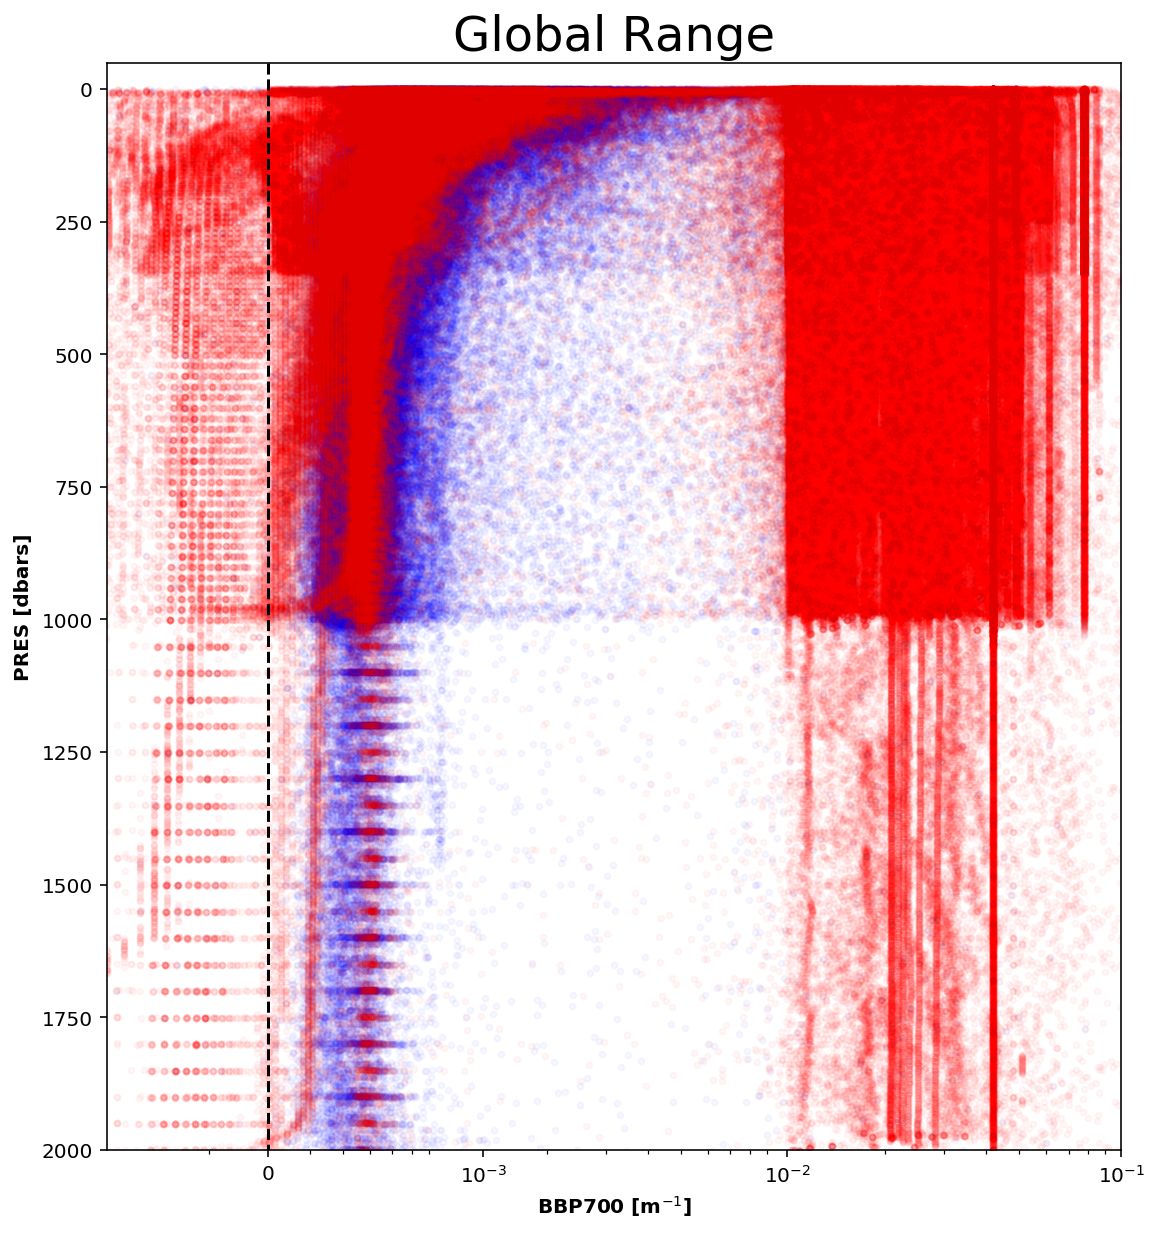

In [15]:
# plots results for Global range test (A)

x1 = all_BBP700[:][::iN]
x2 = all_BBP700[iQCge3][iA][::]
y1 = all_PRES[:][::iN]
y2 = all_PRES[iQCge3][iA][::]
plot_iQC(x1, x2, y1, y2, tests['A'])

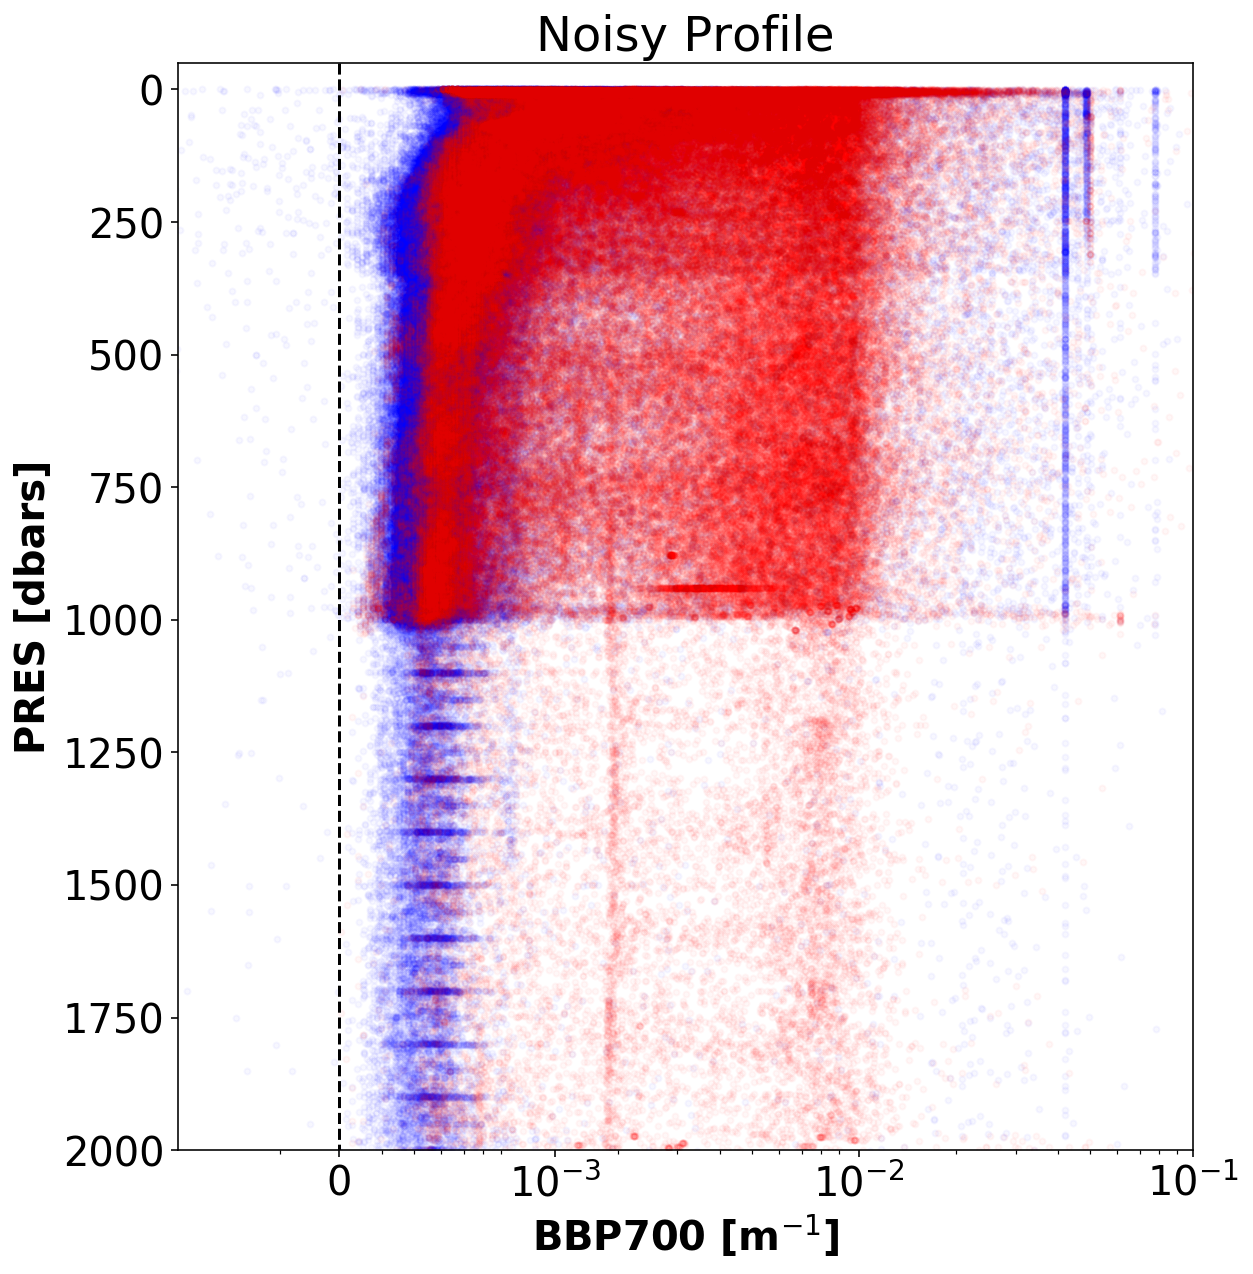

In [16]:
# plots results for test (B)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iB][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iB][::]
plot_iQC(x1, x2, y1, y2, tests['B'])

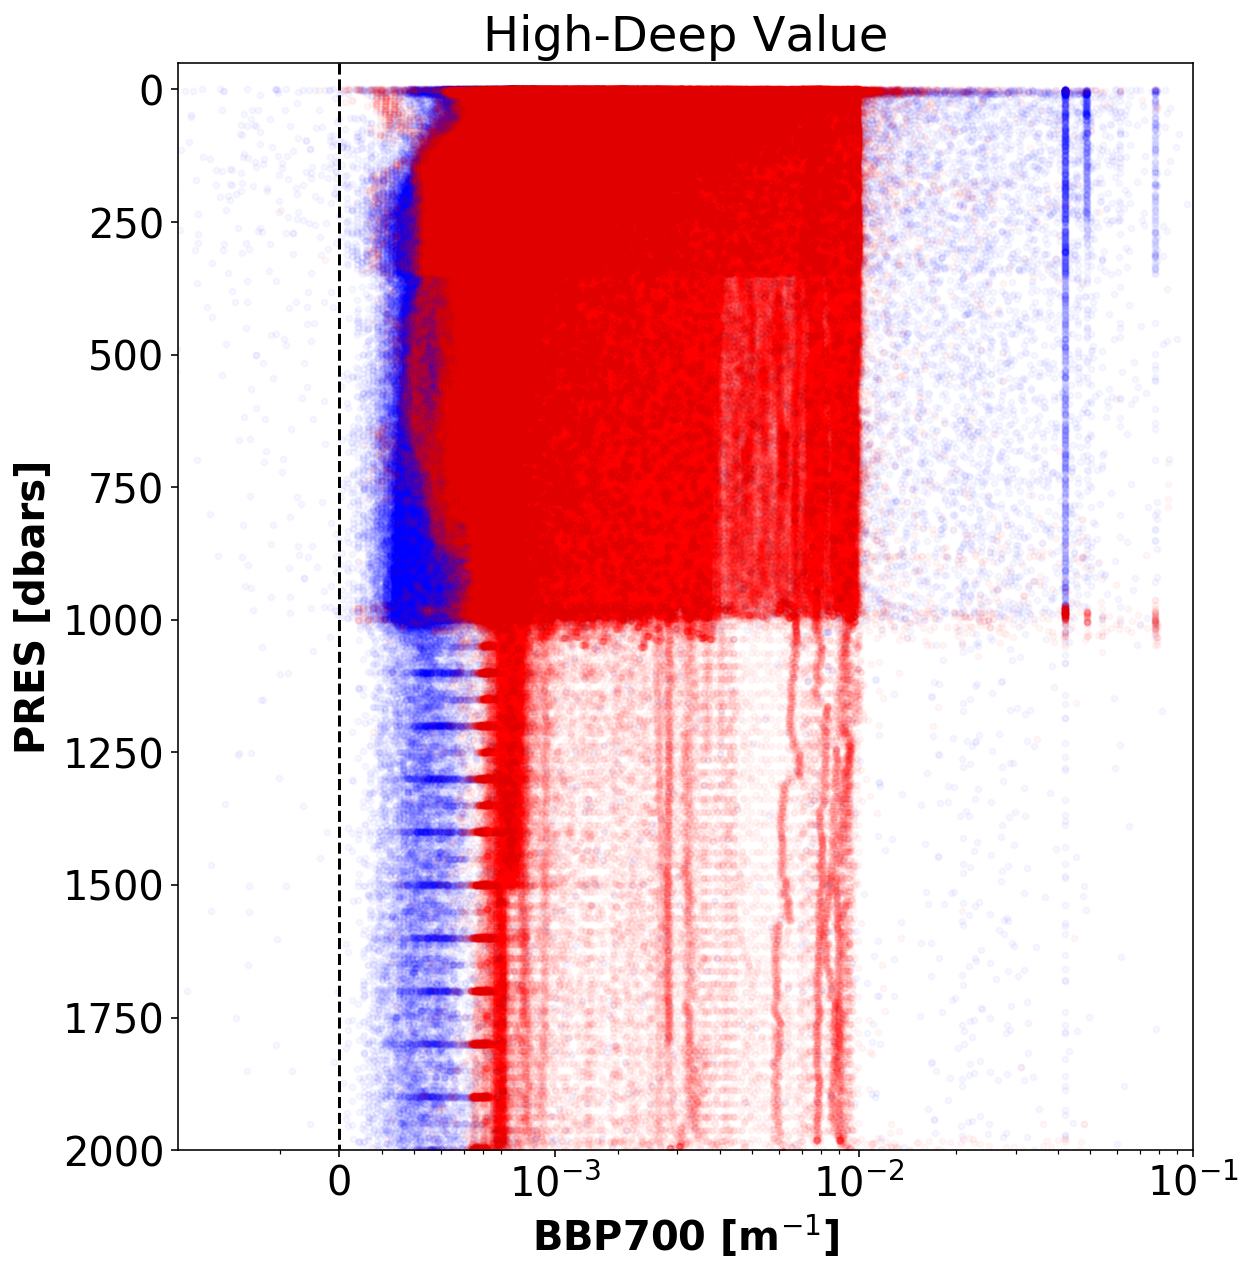

In [17]:
# plots results for test (C)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iC][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iC][::]
plot_iQC(x1, x2, y1, y2, tests['C'])

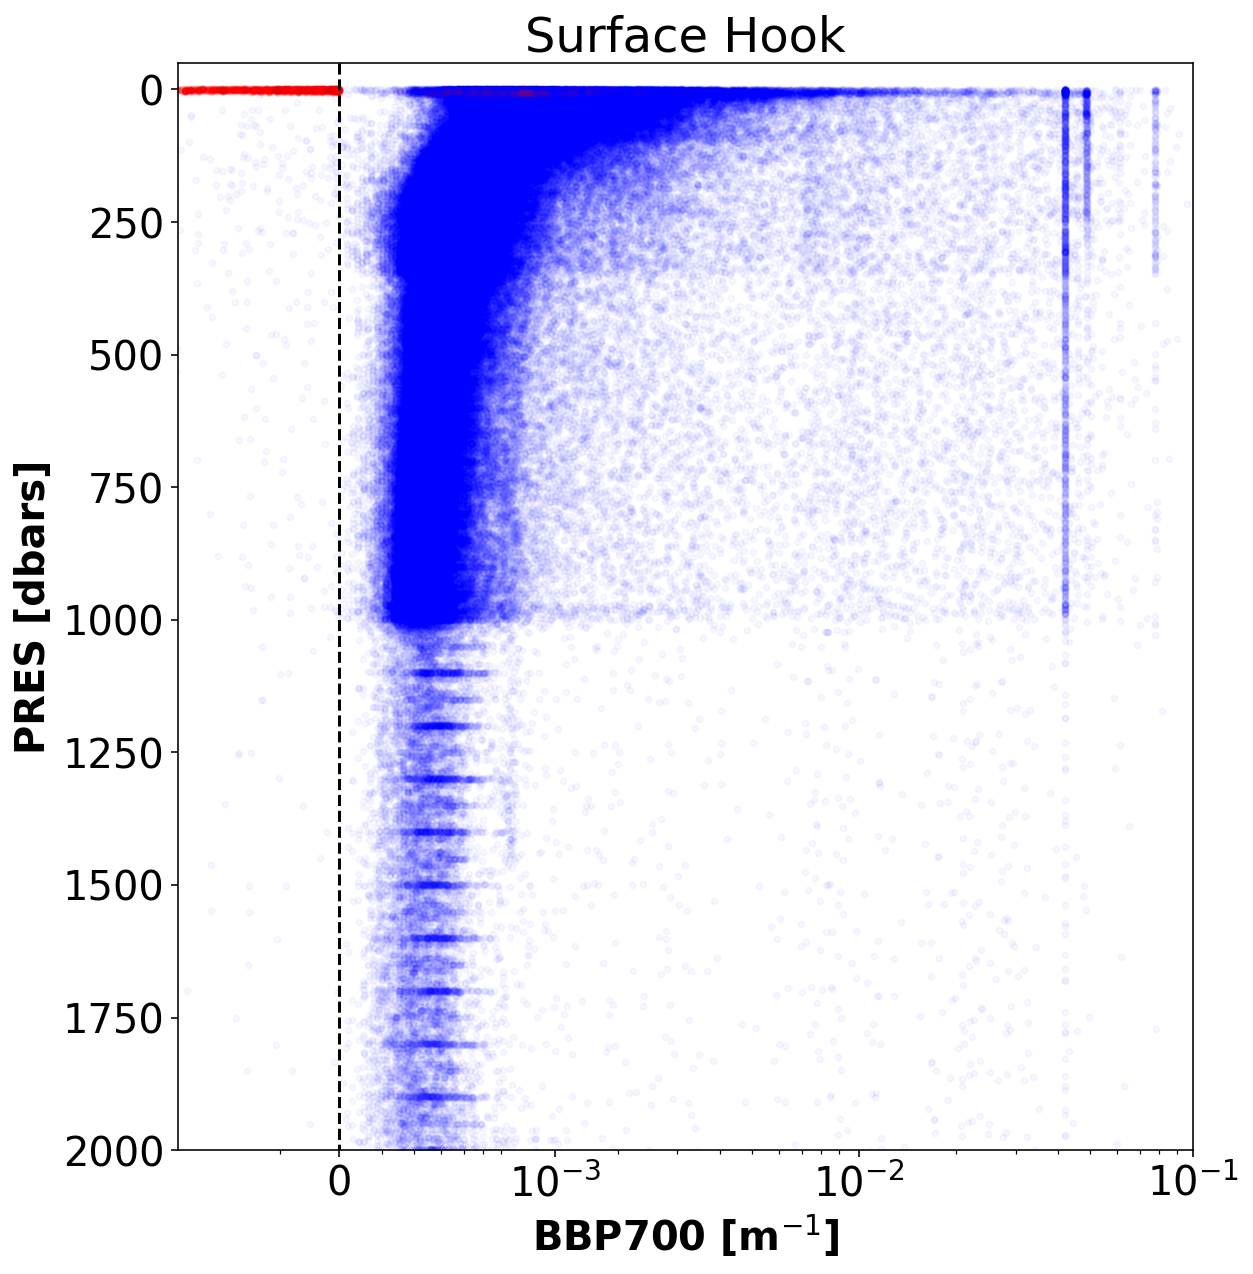

In [18]:
# plots results for test (D)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iD][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iD][::]
plot_iQC(x1, x2, y1, y2, tests['D'])

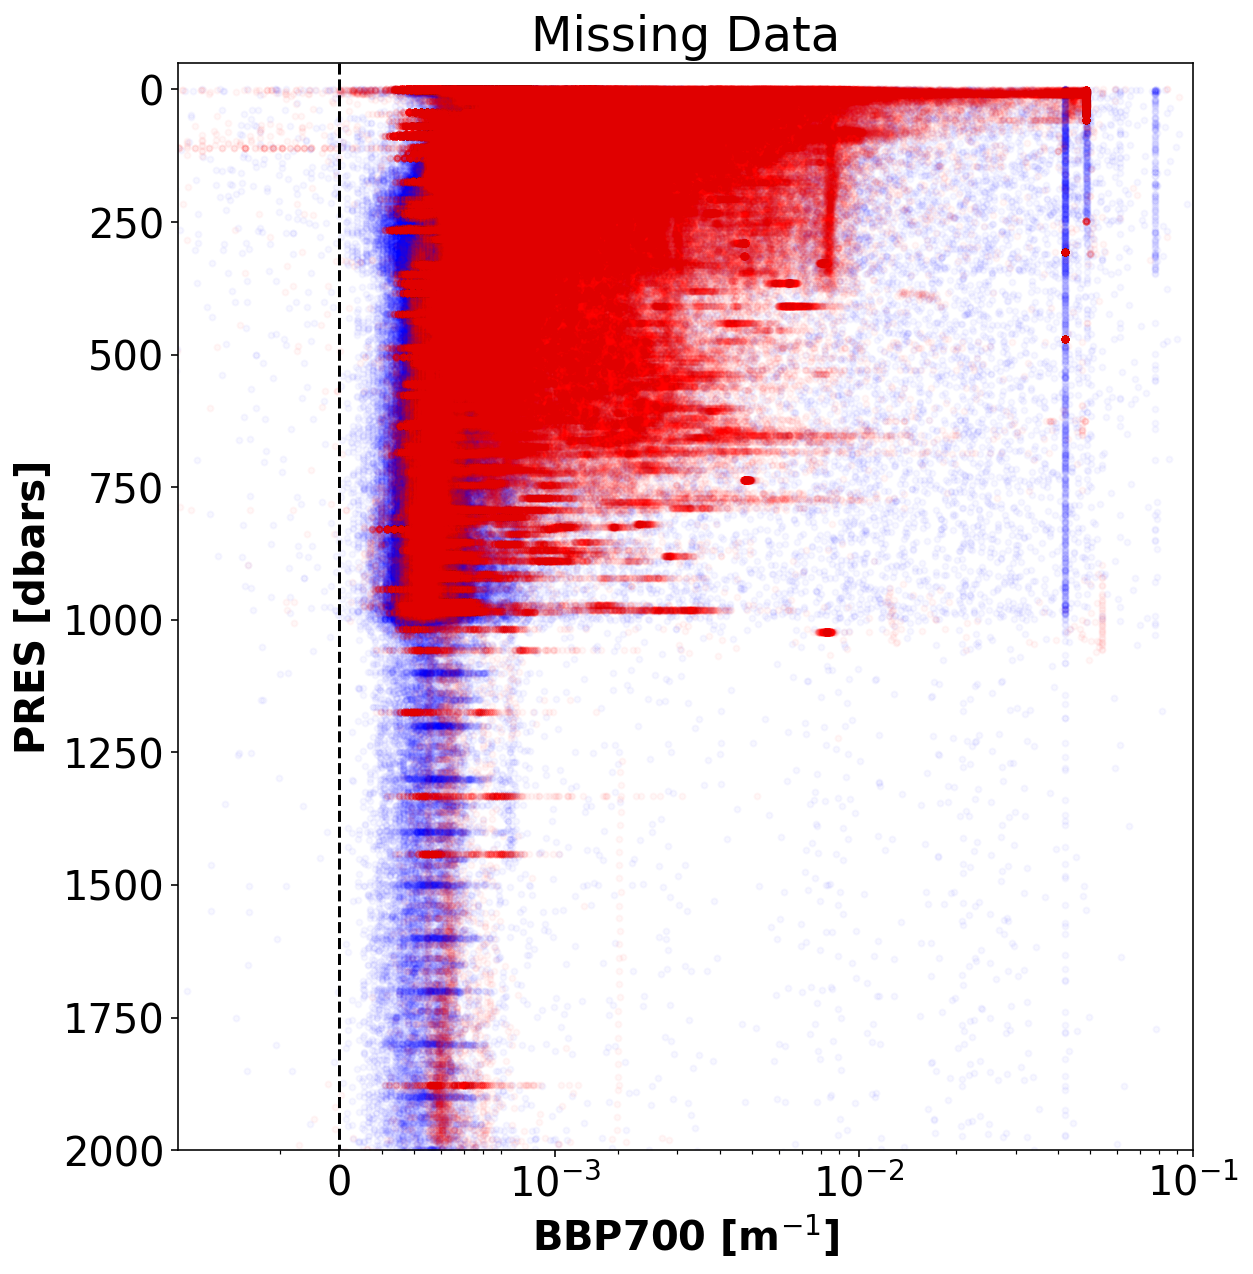

In [19]:
# plots results for test (E)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iE][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iE][::]
plot_iQC(x1, x2, y1, y2, tests['E'])

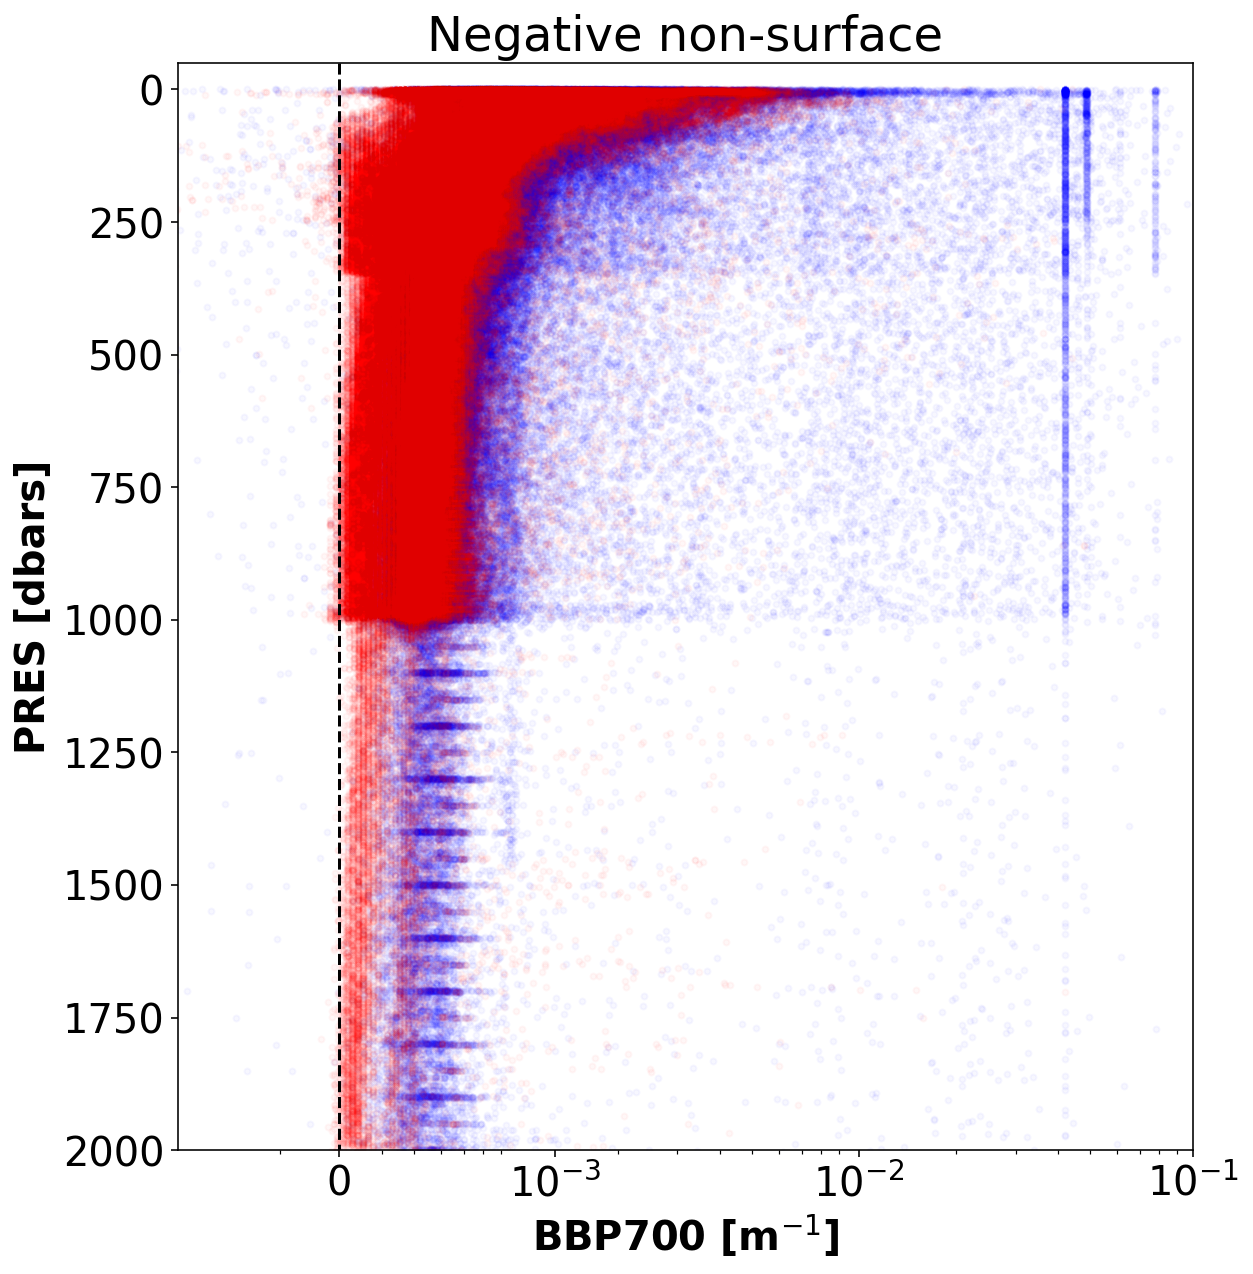

In [20]:
# plots results for test (F)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iF][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iF][::]
plot_iQC(x1, x2, y1, y2, tests['F'])

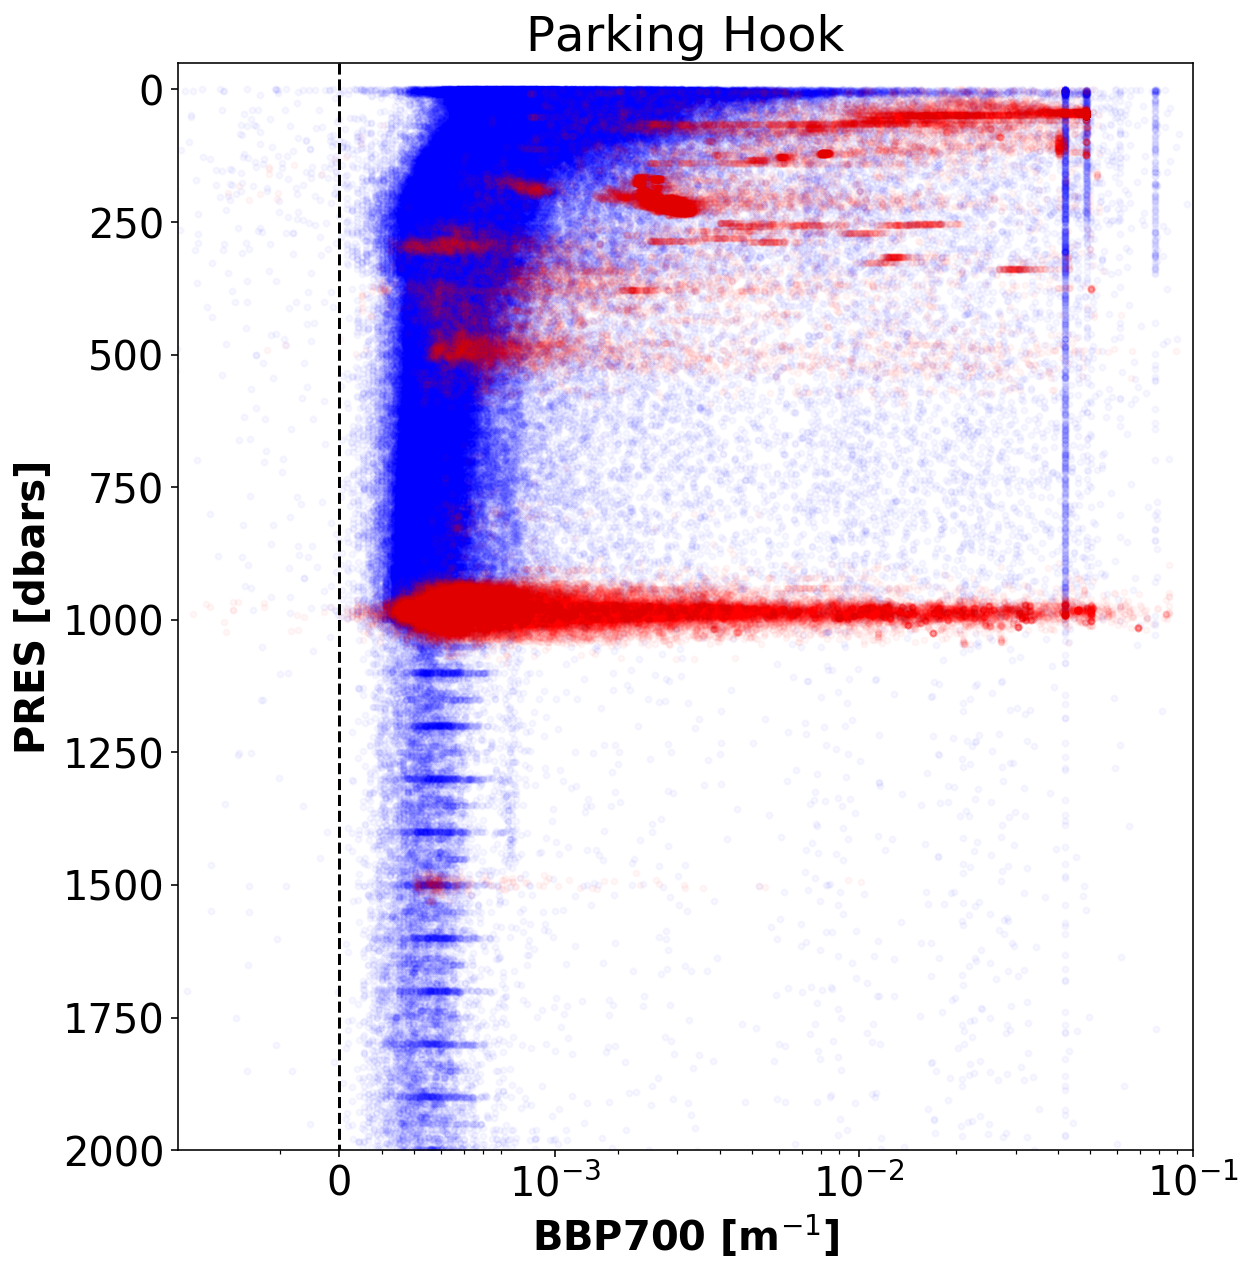

In [21]:
# plots results for test (G)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iG][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iG][::]
plot_iQC(x1, x2, y1, y2, tests['G'])

In [22]:
# # plots results for test (G)
# # x1 = np.array(all_BBP700)[:][::iN]
# iH = np.where((all_BBP700<1.5e-4) & (all_PRES>500)  )[0] # global range

# x2 = all_BBP700[iH][::]
# # y1 = np.array(all_PRES)[:][::iN]
# y2 = all_PRES[iH][::]
# plot_iQC(x1, x2, y1, y2, 'low deep values')

# print([np.median(all_LAT[iH]), np.median(all_LON[iH])])
# print([np.std(all_LAT[iH]), np.std(all_LON[iH])])
# print(np.unique(all_WMO[iH]))
# print(np.unique(all_SENSOR_MODEL[iH]))


6661

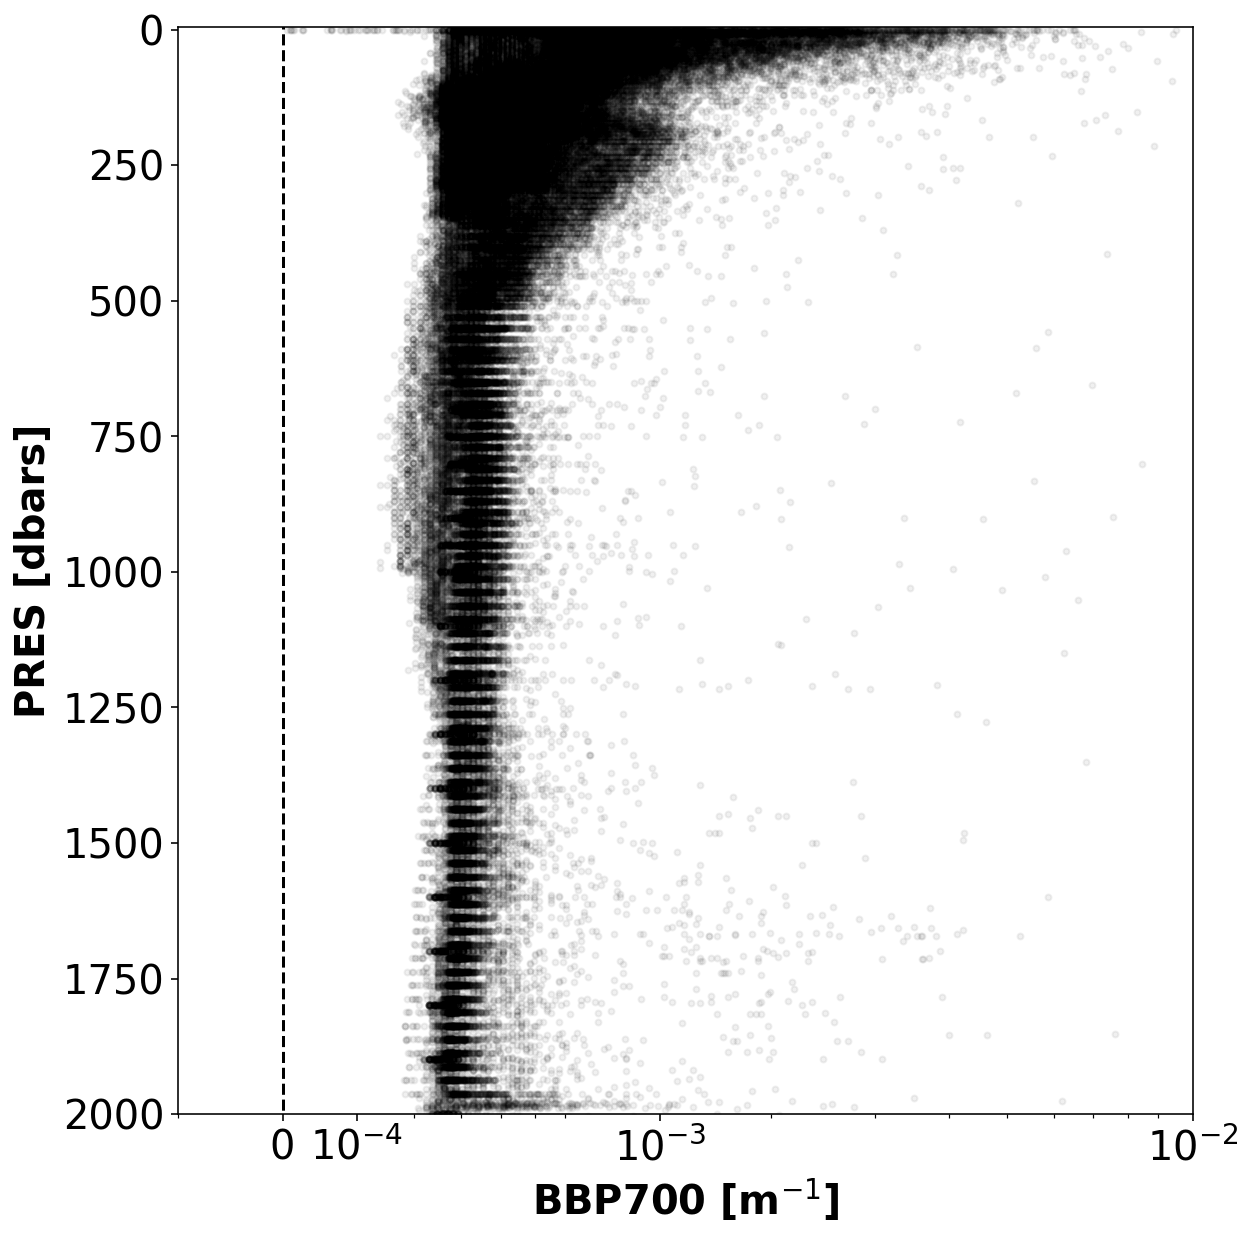

In [36]:
iN = 100# %matplotlib widget
iTmax = 100000
#int(iall.size/3.) # step size to make plotting faster
fig = plt.figure(figsize=(20,10))
xmin = 0.0002
xmax = 0.01
xoff = 0.0003
ax1 = fig.add_subplot(1,2,1)
# ax1.plot(all_BBP700[iQCge3][::iN]+xoff, all_PRES[iQCge3][::iN], 'ro', ms=3, alpha=0.2, zorder=60) # this is to add the data that were flagged QC>=3
# ax1.plot(all_BBP700[iQCle2][::iN]+xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.06, zorder=60) # this is to plot every iN data point
ax1.plot(all_BBP700[iQCle2][:iTmax]+xoff, all_PRES[iQCle2][:iTmax], 'ko', ms=3, alpha=0.06, zorder=60) # this is to plot only some floats
ax1.plot((xoff, xoff), (-50, 2000), 'k--')
ax1.set_ylim([-5, 2000])

ax1.set_xlim([xmin, xmax])
ax1.invert_yaxis()
ax1.set_xscale('log')
ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
ax1.set_ylabel('PRES [dbars]', fontweight='bold')
xts = list(np.asarray([0, 1e-4, 1e-3, 1e-2]) + xoff)
xtklbls = ('0',  '10'+'$^{-4}$', '10'+'$^{-3}$', '10'+'$^{-2}$')
plt.xticks(xts, xtklbls)
plt.rcParams.update({'font.size': 20})


gc.collect()
    

6677

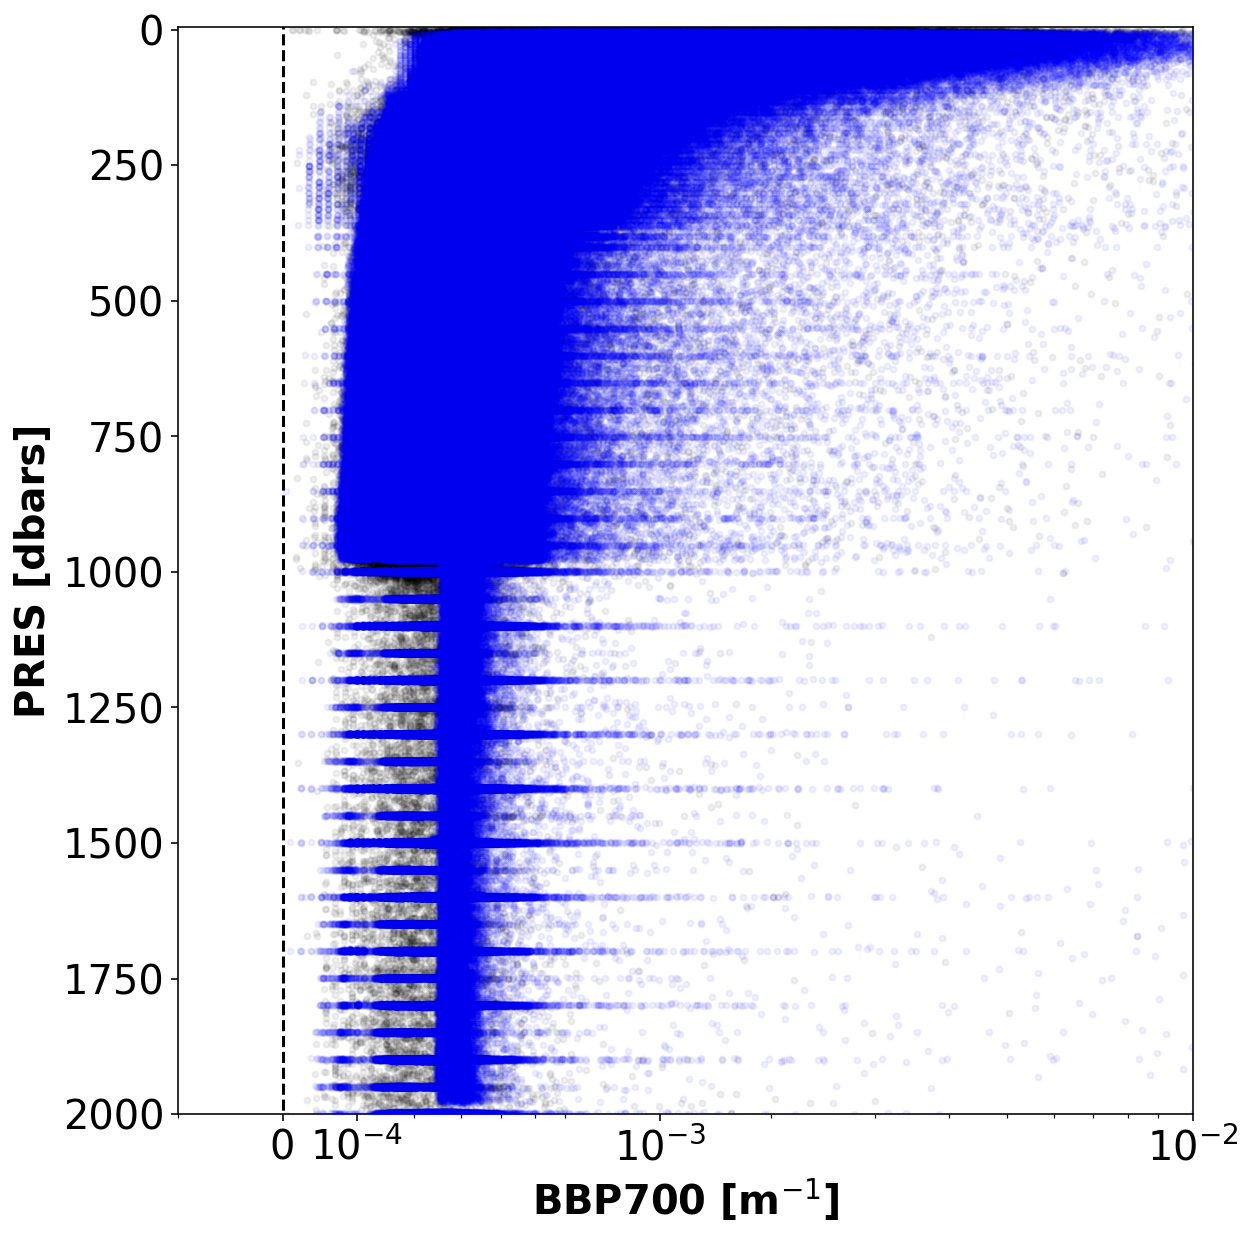

In [38]:
# this is to plot one DAC vs the entire dataset
iDAC = np.where(pd.Series(all_WMO[iQCle2]).str.contains('aoml').values)[0] # select data from given DAC
iN = 100# %matplotlib widget
#int(iall.size/3.) # step size to make plotting faster
fig = plt.figure(figsize=(20,10))
xmin = 0.0002
xmax = 0.01
xoff = 0.0003
ax1 = fig.add_subplot(1,2,1)
ax1.plot(all_BBP700[iQCle2][::iN]+xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.06, zorder=1) # this is to plot every iN data point
ax1.plot(all_BBP700[iQCle2][iDAC]+xoff, all_PRES[iQCle2][iDAC], 'bo', ms=3, alpha=0.06, zorder=60) # this is to plot only some floats
ax1.plot((xoff, xoff), (-50, 2000), 'k--')
ax1.set_ylim([-5, 2000])

ax1.set_xlim([xmin, xmax])
ax1.invert_yaxis()
ax1.set_xscale('log')
ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
ax1.set_ylabel('PRES [dbars]', fontweight='bold')
xts = list(np.asarray([0, 1e-4, 1e-3, 1e-2]) + xoff)
xtklbls = ('0',  '10'+'$^{-4}$', '10'+'$^{-3}$', '10'+'$^{-2}$')
plt.xticks(xts, xtklbls)
plt.rcParams.update({'font.size': 20})


gc.collect()
    

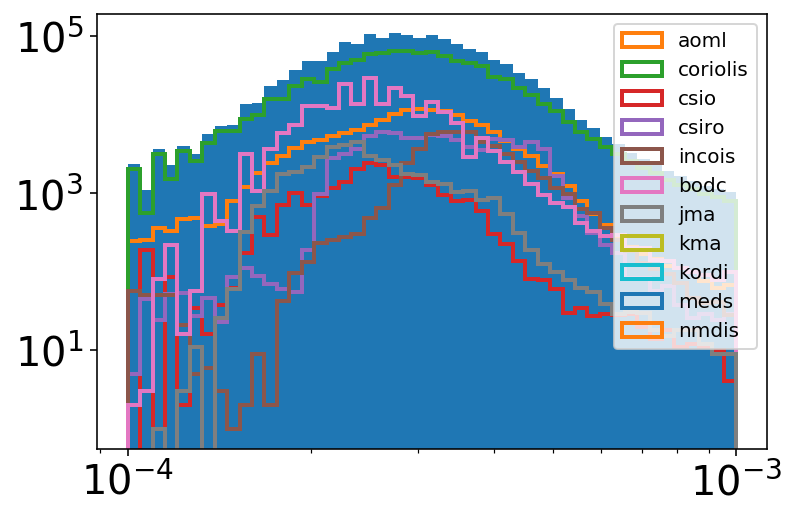

In [24]:
i500 = np.where((all_PRES[iQCle2]<=550) & (all_PRES[iQCle2]>=450))
plt.hist(all_BBP700[iQCle2][i500], bins=np.logspace(-4,-3, 50));

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][i500]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][i500][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)


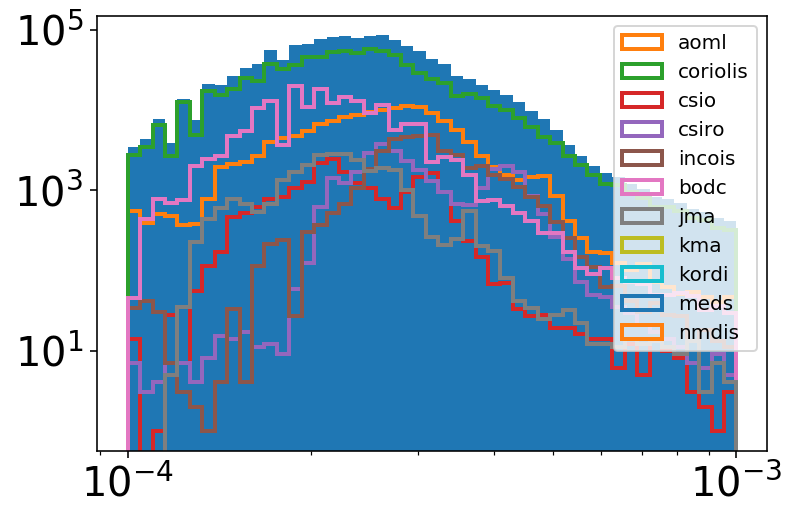

In [25]:
iLT1000 = np.where((all_PRES[iQCle2]<=1000) & (all_PRES[iQCle2]>=900))
plt.hist(all_BBP700[iQCle2][iLT1000], bins=np.logspace(-4,-3, 50));

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iLT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iLT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)


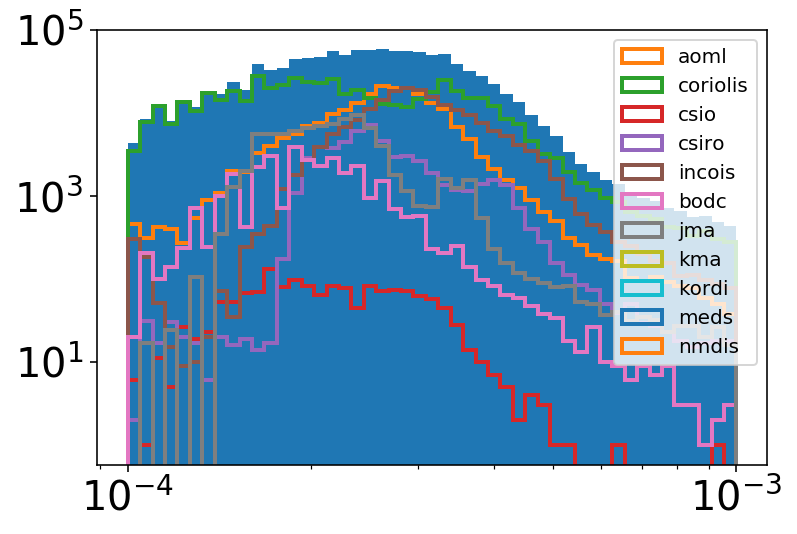

In [26]:

iGT1000 = np.where((all_PRES[iQCle2]>=1000))
plt.hist(all_BBP700[iQCle2][iGT1000], bins=np.logspace(-4,-3, 50));
# plt.gca().set_xticklabels([1e-4, 2e-4, 4e-4, 6e-4, 8e-4, 10e-4], fontsize=20)

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iGT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iGT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)